In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings('ignore')

%matplotlib inline

In [227]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [228]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [229]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv',sep=',')

In [230]:
#df = pd.read_csv('creditcard.csv')

In [231]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [232]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [234]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [235]:
df.shape

(284807, 31)

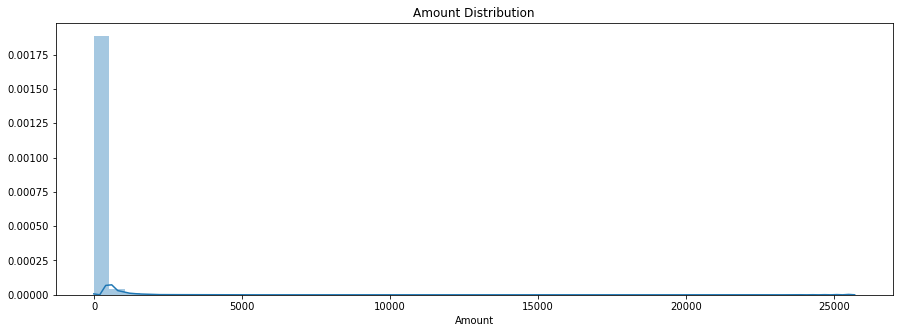

In [236]:
plt.figure(figsize=(15,5))
plt.title('Amount Distribution')
sns.distplot(df.Amount)

In [237]:
df.Class.unique()

array([0, 1], dtype=int64)

In [238]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

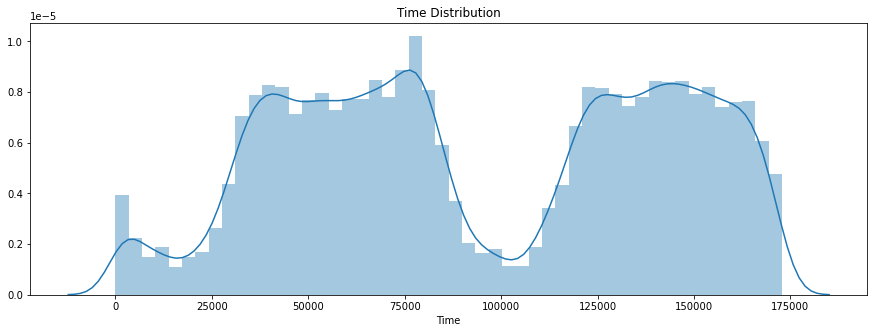

In [239]:
plt.figure(figsize=(15,5))
plt.title('Time Distribution')
sns.distplot(df.Time)

In [240]:
counts = df.Class.value_counts()
normal = counts[0]
fraud = counts[1]
sum = normal+fraud
per_normal = (normal/(sum)) * 100
per_fraud = (fraud/(sum)) * 100

In [241]:
print('{} non-fraud ({:.3f}%) and {} fraud ({:.3f}%).'.format(normal, per_normal, fraud, per_fraud))

284315 non-fraud (99.827%) and 492 fraud (0.173%).


Text(0.5, 1.0, 'Heatmap of all features')

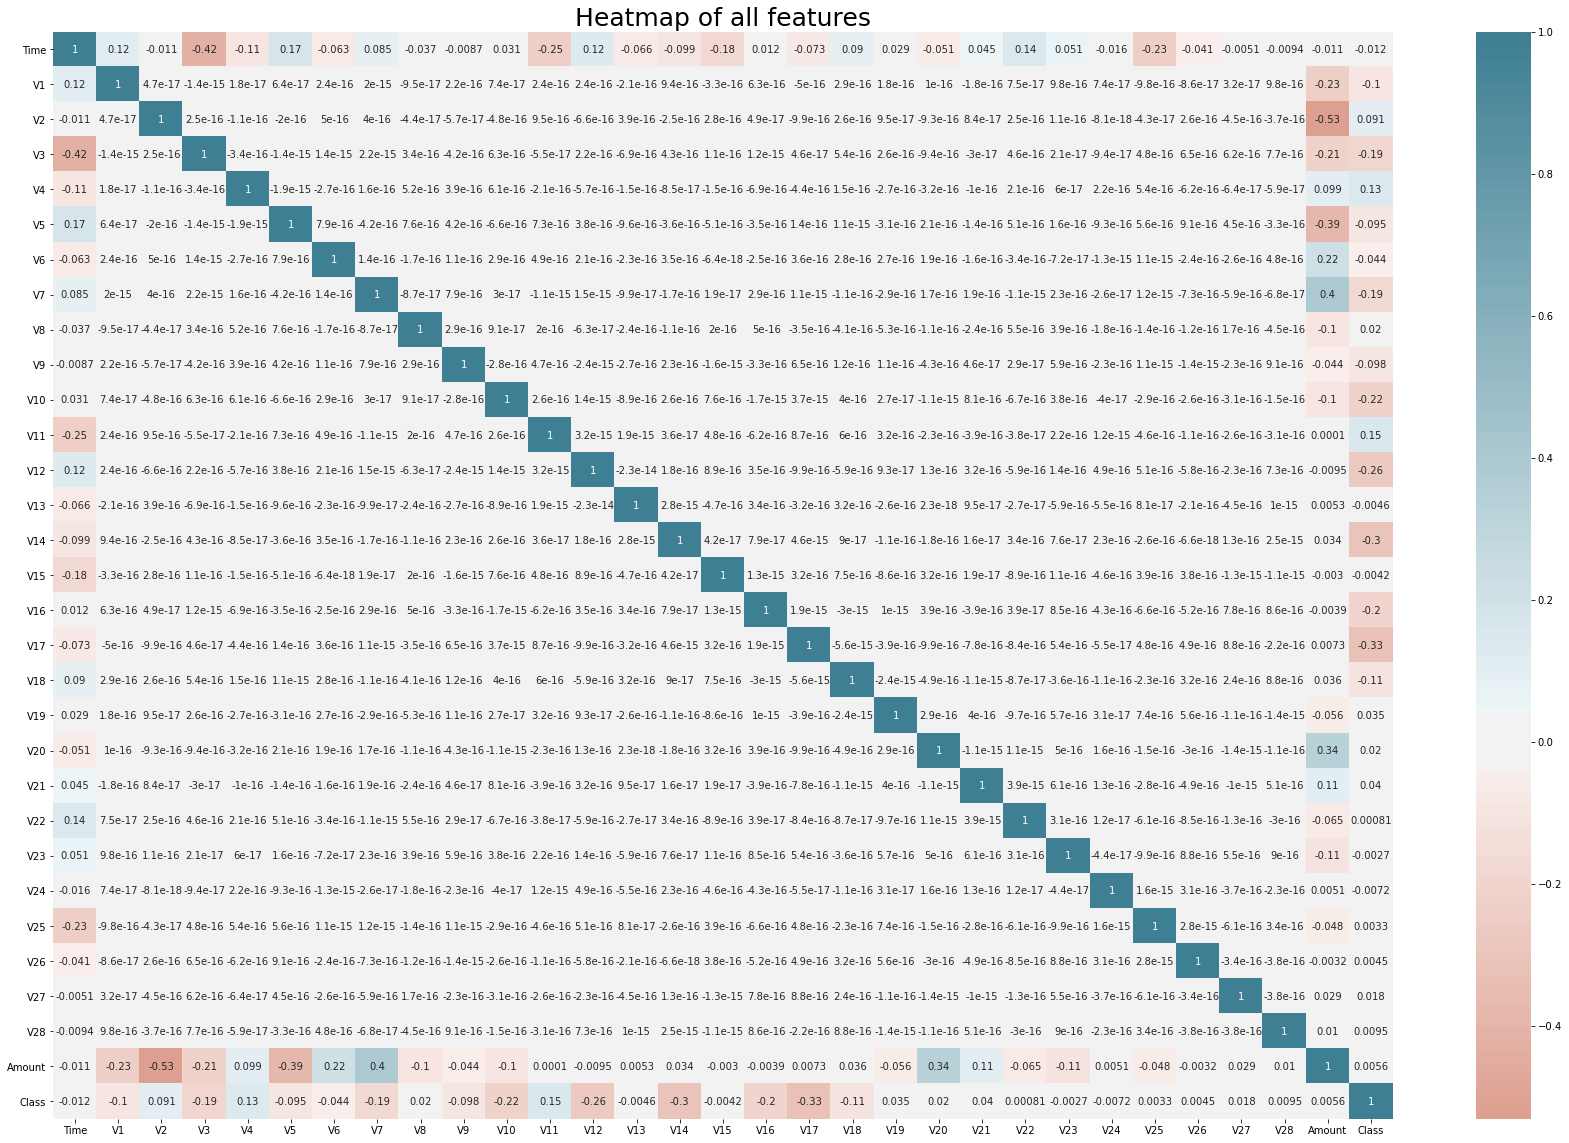

In [242]:
plt.subplots(figsize = (30,20))
sns.heatmap(df.corr(),cmap=sns.diverging_palette(20, 220, n=200),annot=True, center =0)
plt.title('Heatmap of all features',fontsize=25)

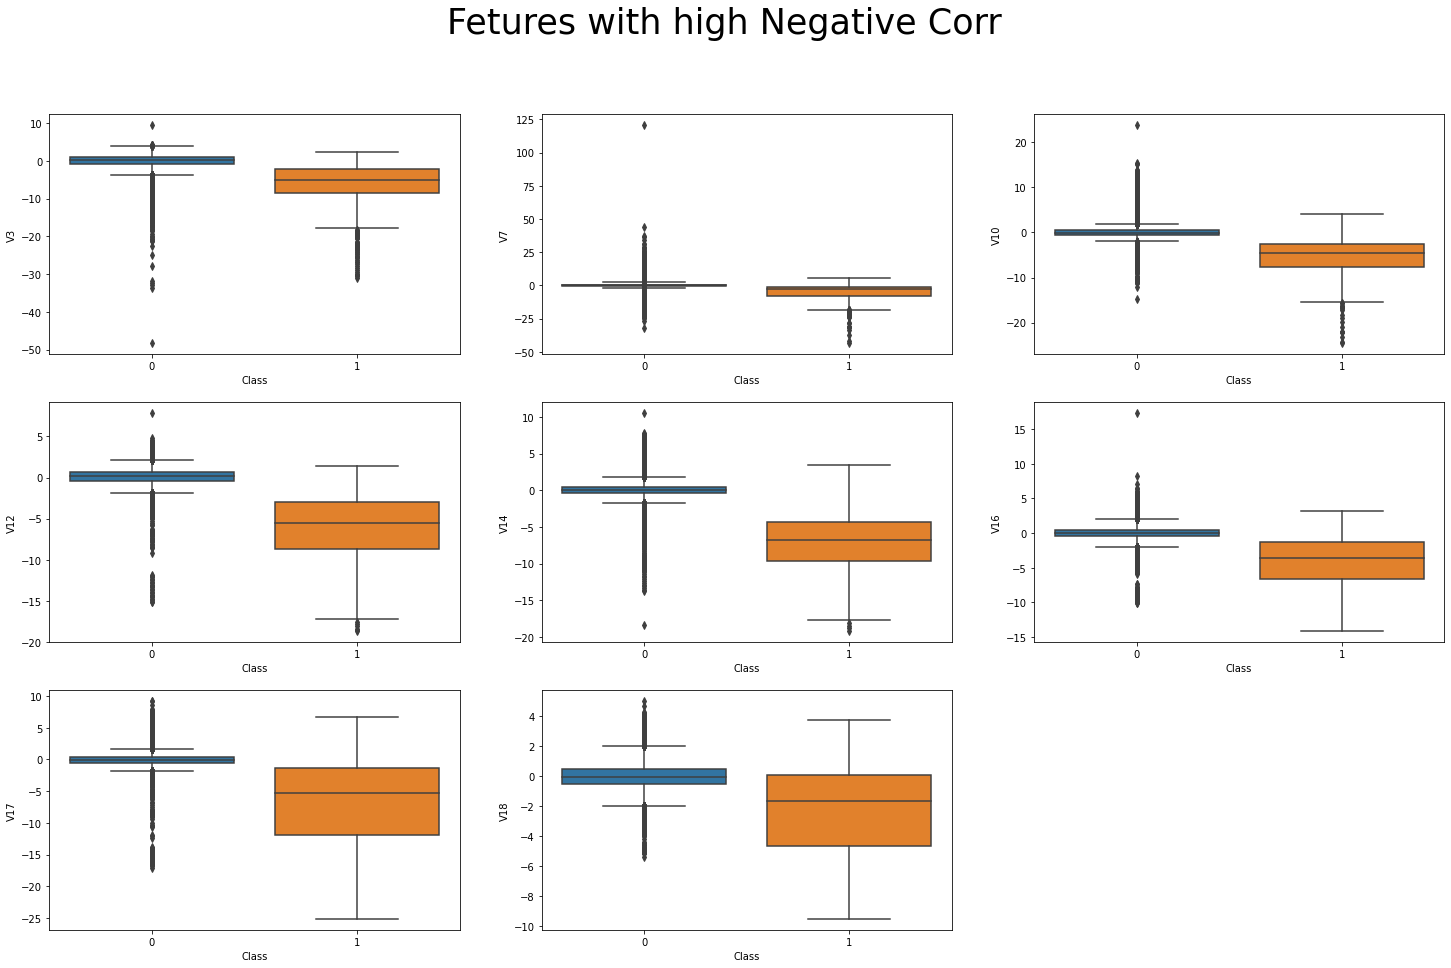

In [243]:
f,axes = plt.subplots(nrows=3,ncols=3,figsize=(25,15))

f.suptitle('Fetures with high Negative Corr',size = 35)

sns.boxplot(x="Class", y="V3", data=df, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=df, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=df, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=df, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=df, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=df, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=df, ax=axes[2,0])
sns.boxplot(x="Class", y="V18", data=df, ax=axes[2,1])
f.delaxes(axes[2,2])

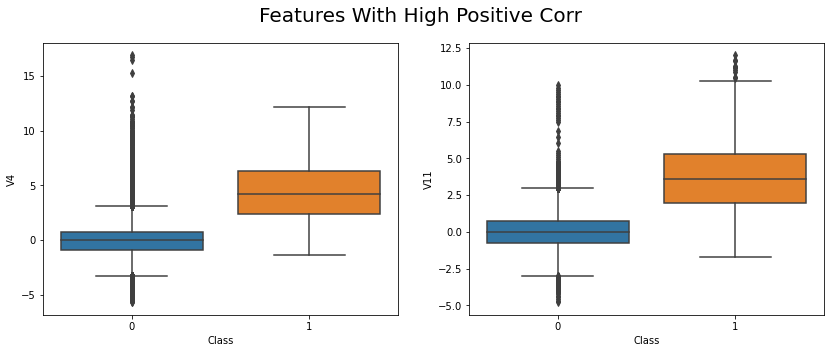

In [244]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

f.suptitle('Features With High Positive Corr', size=20)
sns.boxplot(x="Class", y="V4", data=df, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=df, ax=axes[1])

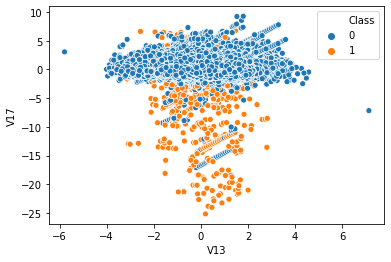

In [245]:
sns.scatterplot(x=df['V13'], y=df['V17'], hue=df['Class'])

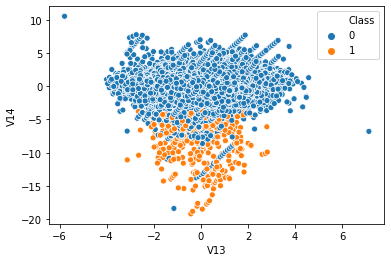

In [246]:
sns.scatterplot(x=df['V13'], y=df['V14'], hue=df['Class'])

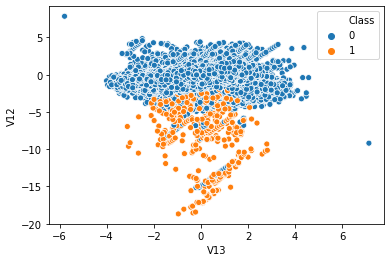

In [247]:
sns.scatterplot(x=df['V13'], y=df['V12'], hue=df['Class'])

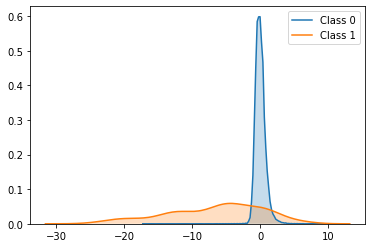

In [248]:
sns.kdeplot(data=df[df['Class'] == 0]['V17'], label="Class 0", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V17'], label="Class 1", shade=True)
plt.legend()

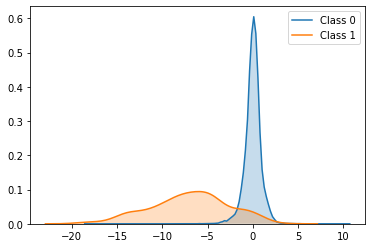

In [249]:
sns.kdeplot(data=df[df['Class'] == 0]['V14'], label="Class 0", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V14'], label="Class 1", shade=True)

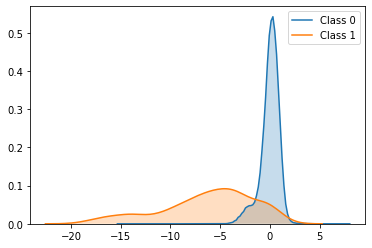

In [250]:
sns.kdeplot(data=df[df['Class'] == 0]['V12'], label="Class 0", shade=True)
sns.kdeplot(data=df[df['Class'] == 1]['V12'], label="Class 1", shade=True)

In [251]:
#print(df.apply(lambda x:[x.unique()]))

In [253]:
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
df = df.drop (['Time'], axis = 1);

In [255]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [256]:
number_records_fraud = len (df[df['Class']==1])

In [257]:
fraud_indices = np.array (df[df['Class']==1].index)
normal_indices = np.array (df[df['Class']==0].index)

In [258]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [259]:
under_sample_data = df.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [260]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [261]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc 

0.9591836734693877

In [262]:
accuracy_score(y_test,y_pred)

0.9681659117774423

In [263]:
roc_auc_score(y_test,y_pred)

0.9636825326641629

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.05      0.96      0.09       147

    accuracy                           0.97     85443
   macro avg       0.52      0.96      0.54     85443
weighted avg       1.00      0.97      0.98     85443



We got a high recall which means our model is able to detect the highest number of fraud transactions, while the precision is very low which is not good because it means that the model classifies a lot of non-fraud transactions as fraud. The customers of a financial firm are not going to be satisfied with that and may even stop using the service of that financial firm. So in this case it's also important to have a high precision, which we are going to try to achieve using oversampling over the unbalanced data and then trying ML model over it to see the difference. 

Transaction Number x_train dataset:  (199364, 29)
Transaction Number y_train dataset:  (199364,)
Transaction Number x_test dataset:  (85443, 29)
Transaction Number y_test dataset:  (85443,)


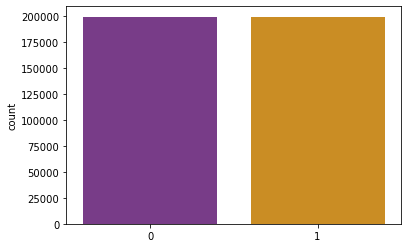

In [265]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())
sns.countplot(x=y_train_s, data=df, palette='CMRmap')

In [266]:
x_train_s.shape

(398038, 29)

In [267]:
 y_train_s.shape

(398038,)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



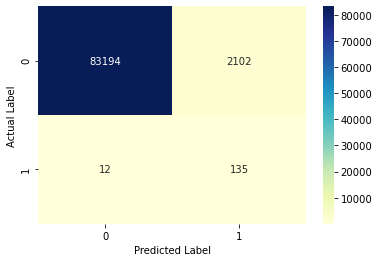

In [269]:
logreg = LogisticRegression()
logreg.fit(x_train_s, y_train_s)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



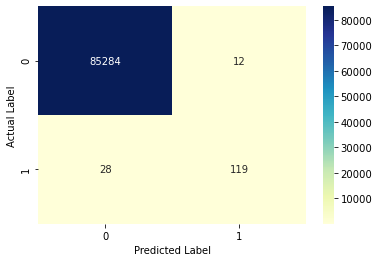

In [220]:
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(n_estimators=100, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train_s, y_train_s)
y_pred = rand_f.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

In [222]:
roc_auc_score(y_test,y_pred)

0.9046915614867218

In [223]:
accuracy_score(y_test,y_pred)

0.9995318516437859

Random Forest gave us the best results being able to detect more than 80% fraud transactions and at the same time not classifying a lot of non-fraud transactions as fraud.